<a href="https://colab.research.google.com/github/Keonbowman1/data_science/blob/main/spam_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import plotly.express as px
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [51]:
#lets import the data

df = pd.read_csv("https://raw.githubusercontent.com/Keonbowman1/data_science/main/phishing_data.csv", encoding= 'latin-1')

In [52]:
df.head()

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [53]:
#How much data do i have?
#what are my data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3713 entries, 0 to 3712
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Email Text  3287 non-null   object
 1   Email Type  3099 non-null   object
dtypes: object(2)
memory usage: 58.1+ KB


In [54]:
# Dropping null values

df = df.dropna()

In [55]:
#removing rows that dont have an email type

df = df.drop(df[(df['Email Type'] != 'Phishing Email') & (df['Email Type'] != 'Safe Email')].index)

In [56]:
df['Email Type'].unique()

array(['Safe Email', 'Phishing Email'], dtype=object)

In [57]:
#how many phishing emails do i have

df.groupby('Email Type').describe()

Email Text                   
                    count unique    top freq
Email Type                                  
Phishing Email       1219   1140  empty   65
Safe Email           1775   1739  empty   31

In [58]:
# Creating a column with 0s and 1s to specify whether the email is spam or not. 1 = spam

df['spam'] = df['Email Type'].apply(lambda x : 1 if x == 'Phishing Email' else 0)
df.head()

,Email Text,Email Type,spam
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email,0
1,the other side of * galicismos * * galicismo *...,Safe Email,0
2,re : equistar deal tickets are you still avail...,Safe Email,0
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email,1
4,software at incredibly low prices ( 86 % lower...,Phishing Email,1


<Axes: xlabel='Email Type', ylabel='count'>

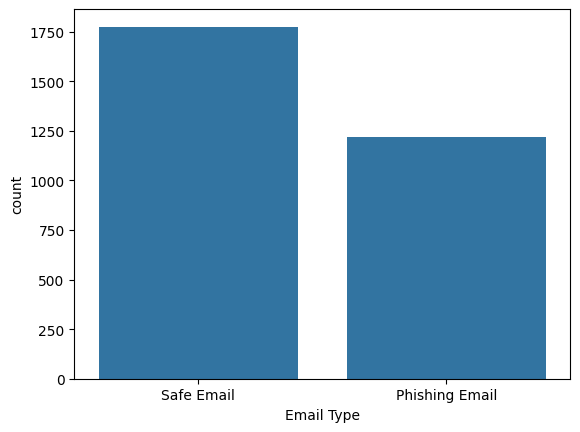

In [59]:
# What is the comparison bewtween spam and not spam?
# Over 1,750 safe emails, compared to over 1250 phishing emails
sns.countplot(x=df["Email Type"])

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2994 entries, 0 to 3712
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Email Text  2994 non-null   object
 1   Email Type  2994 non-null   object
 2   spam        2994 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 93.6+ KB


In [62]:
# Seperating my X and y values to fit the data

x = np.array(df["Email Text"])
y = np.array(df["spam"])

In [63]:
cv = CountVectorizer()
X = cv.fit_transform(x) # We have to transform our text data into numerical values first

In [64]:
# Seperating training and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [65]:
# lets test the accuracy againts our test data

clf = MultinomialNB()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9716193656093489

In [ ]:
#this code will be used to create an input box on streamlit

clf = MultinomialNB()
clf.fit(X_train,y_train)
import streamlit as st
st.title("Spam Detection System")
def spamdetection():
    user = st.text_area("Enter any Message or Email: ")
    if len(user) < 1:
        st.write("  ")
    else:
        sample = user
        data = cv.transform([sample]).toarray()
        a = clf.predict(data)
        st.title(a)
spamdetection()